# LMC BFE computation

1. Load LMC particles.
2. Center the particles in the LMC COM and center the velocities as well.
3. Compute the BFE.
4. Compute the Energies. Potential and Kinematic.
5. Select bound particles.
6. Iterate from 3-5 untill convergence on the number of bound particles.
7. Use the bound particles to compute the BFE using the bootstrap method and S/N cut.


In [1]:
%pylab inline
import biff
import coefficients_smoothing
import reading_snapshots
import pygadgetreader

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [102]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

In [2]:
G_gadget=43007.1

# 1. Load LMC particles

In [3]:
mwlmc_pos = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'pos','dm')
mwlmc_vel = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'vel','dm')


Returning DM    Positions
Returning DM    Velocities


In [4]:
mwlmc_ids = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'pid','dm')

Returning DM    Particle IDs


In [5]:
mwlmc_ids = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'pid','dm')

Returning DM    Particle IDs


In [6]:
mwlmc_pot = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'pot','dm')

Returning DM    Potential


In [7]:
mwlmc_mass = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'mass','dm')

Returning DM    Mass


In [8]:
mwlmc_mass[0]

1.5772125e-06

In [9]:
pos_lmc, vel_lmc, ids_lmc, pot_lmc = reading_snapshots.sat_particles(mwlmc_pos, 
                                                                     mwlmc_vel, 
                                                                     mwlmc_ids,
                                                                     mwlmc_pot,
                                                                     100000000)

### random sample of the LMC halo 

In [46]:
rand_particles=random_1e6_partiles=np.random.randint(0, len(ids_lmc), 1000000)
rand_particles_test=random_1e4_partiles=np.random.randint(0, len(ids_lmc), 10000)

In [47]:
LMC_mass = np.sum(np.ones(15000000)*mwlmc_mass[0])
LMC_pmass = LMC_mass/1E6
LMC_pmass

2.365818772886996e-05

In [48]:
LMC_mass = np.sum(np.ones(15000000)*mwlmc_mass[0])
LMC_pmass_test = LMC_mass/1E4
LMC_pmass_test

0.002365818772886996

# 2 .LMC com coordinates

In [12]:
reading_snapshots.com_shrinking_sphere(pos_lmc[rand_particles], vel_lmc[rand_particles], np.ones(1000000)*LMC_pmass)

0.80895257


(array([  7.50157014,   0.75741018, -31.2676951 ]),
 array([ -42.53890866, -229.72099788,  184.89367853]))

In [13]:
xlmc_com = 7.50157014
ylmc_com = 0.75741018
zlmc_com = -31.2676951

vxlmc_com = -42.53890866
vylmc_com = -229.72099788
vzlmc_com = 184.89367853


### center LMC on COM and write snapshot.

In [39]:
lmc_array = np.array([pos_lmc[rand_particles,0]-xlmc_com, pos_lmc[rand_particles,1]-ylmc_com,
                     pos_lmc[rand_particles,2]-zlmc_com, vel_lmc[rand_particles,0]-vxlmc_com,
                     vel_lmc[rand_particles,1]-vylmc_com, vel_lmc[rand_particles,2]-vzlmc_com,
                     np.ones(1000000)*LMC_pmass]).T

In [52]:
lmc_array_test = np.array([pos_lmc[rand_particles_test,0]-xlmc_com, pos_lmc[rand_particles_test,1]-ylmc_com,
                     pos_lmc[rand_particles_test,2]-zlmc_com, vel_lmc[rand_particles_test,0]-vxlmc_com,
                     vel_lmc[rand_particles_test,1]-vylmc_com, vel_lmc[rand_particles_test,2]-vzlmc_com,
                     np.ones(10000)*LMC_pmass_test]).T

In [50]:
np.savetxt('lmc_1e6_rand_particles.txt', lmc_array)

In [53]:
np.savetxt('lmc_1e4_rand_particles.txt', lmc_array_test)

In [14]:
pos_lmc_com = np.array([pos_lmc[rand_particles,0]-xlmc_com, 
                        pos_lmc[rand_particles,1]-ylmc_com,
                        pos_lmc[rand_particles,2]-zlmc_com]).T

(-100, 100)

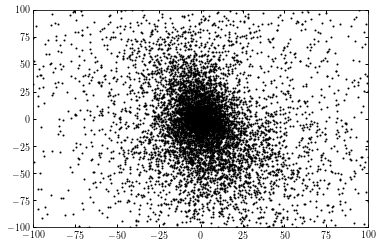

In [15]:
scatter(pos_lmc_com[10000:20000,0], pos_lmc_com[10000:20000,2], s=1, c='k')
xlim(-100, 100)
ylim(-100, 100)

#3. Compute the SCF coefficients and potential

In [17]:
S, T = biff.compute_coeffs_discrete(np.ascontiguousarray(pos_lmc_com).astype(float),
                                    np.ones(1000000)*LMC_pmass, 20, 20, 10)

In [20]:
LMC_potential = biff.potential(np.ascontiguousarray(pos_lmc_com).astype(float), S, T, M=1, r_s=10, G=G_gadget)

# 4. Computing energies: 

In [21]:
vel_lmc_com = np.array([vel_lmc[rand_particles,0]-vxlmc_com, 
                        vel_lmc[rand_particles,1]-vylmc_com,
                        vel_lmc[rand_particles,2]-vzlmc_com]).T

In [29]:
vmag_lmc = np.sqrt(vel_lmc_com[:,0]**2 + vel_lmc_com[:,1]**2 + vel_lmc_com[:,2]**2) 
dist_lmc = np.sqrt(pos_lmc_com[:,0]**2 + pos_lmc_com[:,1]**2 + pos_lmc_com[:,2]**2) 

In [24]:
T = vmag_lmc**2/2
#T_rand = vmag_lmc_rand**2/2
V = LMC_potential

### selecting bound and unbound particles

In [90]:
lmc_bound = np.where(T+V/2.<=0)[0]
lmc_unbound = np.where(T+V/2.>=0)[0]

lmc_bound2 = np.where(T+V<=0)[0]
lmc_unbound2 = np.where(T+V>=0)[0]

lmc_bound3 = np.where(T+2*V<=0)[0]
lmc_unbound3 = np.where(T+2*V>=0)[0]

lmc_bound4 = np.where(T+3*V<=0)[0]
lmc_unbound4 = np.where(T+3*V>=0)[0]

lmc_bound5 = np.where(T+4*V<=0)[0]
lmc_unbound5 = np.where(T+4*V>=0)[0]

lmc_bound6 = np.where(T+5*V<=0)[0]
lmc_unbound6 = np.where(T+5*V>=0)[0]

lmc_bound7 = np.where(T+6*V<=0)[0]
lmc_unbound7 = np.where(T+6*V>=0)[0]

lmc_bound8 = np.where(T+7*V<=0)[0]
lmc_unbound8 = np.where(T+7*V>=0)[0]


In [92]:
print(len(lmc_bound), len(lmc_unbound))
print(len(lmc_bound2), len(lmc_unbound2))
print(len(lmc_bound3), len(lmc_unbound3))
print(len(lmc_bound4), len(lmc_unbound4))
print(len(lmc_bound5), len(lmc_unbound5))
print(len(lmc_bound6), len(lmc_unbound6))
print(len(lmc_bound7), len(lmc_unbound7))
print(len(lmc_bound8), len(lmc_unbound8))

360993 639007
480419 519581
588506 411494
648778 351222
690517 309483
721929 278071
746539 253461
766628 233372


In [97]:
print(np.max(dist_lmc[lmc_bound]))
print(np.max(dist_lmc[lmc_bound2]))
print(np.max(dist_lmc[lmc_bound3]))
print(np.max(dist_lmc[lmc_bound4]))
print(np.max(dist_lmc[lmc_bound5]))
print(np.max(dist_lmc[lmc_bound6]))
print(np.max(dist_lmc[lmc_bound7]))
print(np.max(dist_lmc[lmc_bound8]))

138.57735
160.63222
190.02106
224.47064
247.36034
273.1147
292.40817
323.06927


(-1, 5)

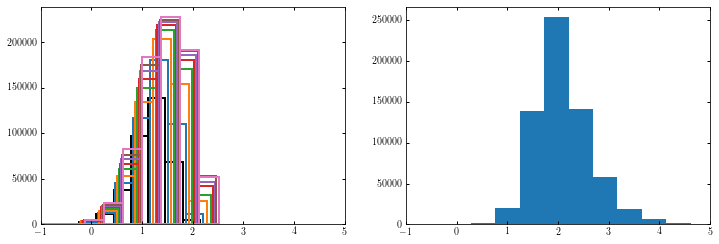

In [93]:
figure(figsize=(12, 4))
subplot(1, 2, 1)
hist(np.log10(dist_lmc[lmc_bound]), fill=False, lw=2)
hist(np.log10(dist_lmc[lmc_bound2]), fill=False, edgecolor='C0', lw=2)
hist(np.log10(dist_lmc[lmc_bound3]), fill=False, edgecolor='C1', lw=2)
hist(np.log10(dist_lmc[lmc_bound4]), fill=False, edgecolor='C2', lw=2)
hist(np.log10(dist_lmc[lmc_bound5]), fill=False, edgecolor='C3', lw=2)
hist(np.log10(dist_lmc[lmc_bound6]), fill=False, edgecolor='C4', lw=2)
hist(np.log10(dist_lmc[lmc_bound7]), fill=False, edgecolor='C5', lw=2)
hist(np.log10(dist_lmc[lmc_bound8]), fill=False, edgecolor='C6', lw=2)

xlim(-1, 5)
subplot(1, 2, 2)
hist(np.log10(dist_lmc[lmc_unbound]))
xlim(-1, 5)


(-200, 200)

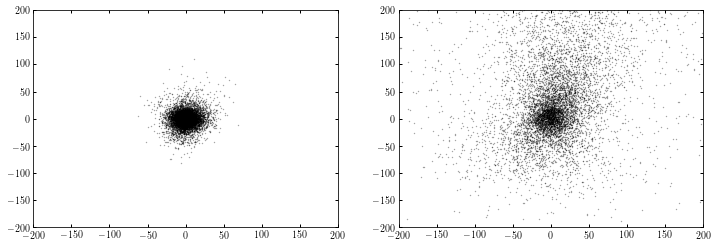

In [37]:
figure(figsize=(12, 4))
subplot(1, 2, 1)
scatter(pos_lmc_com[lmc_bound][0:10000,0], pos_lmc_com[lmc_bound][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)

subplot(1, 2, 2)
scatter(pos_lmc_com[lmc_unbound][0:10000,0], pos_lmc_com[lmc_unbound][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)

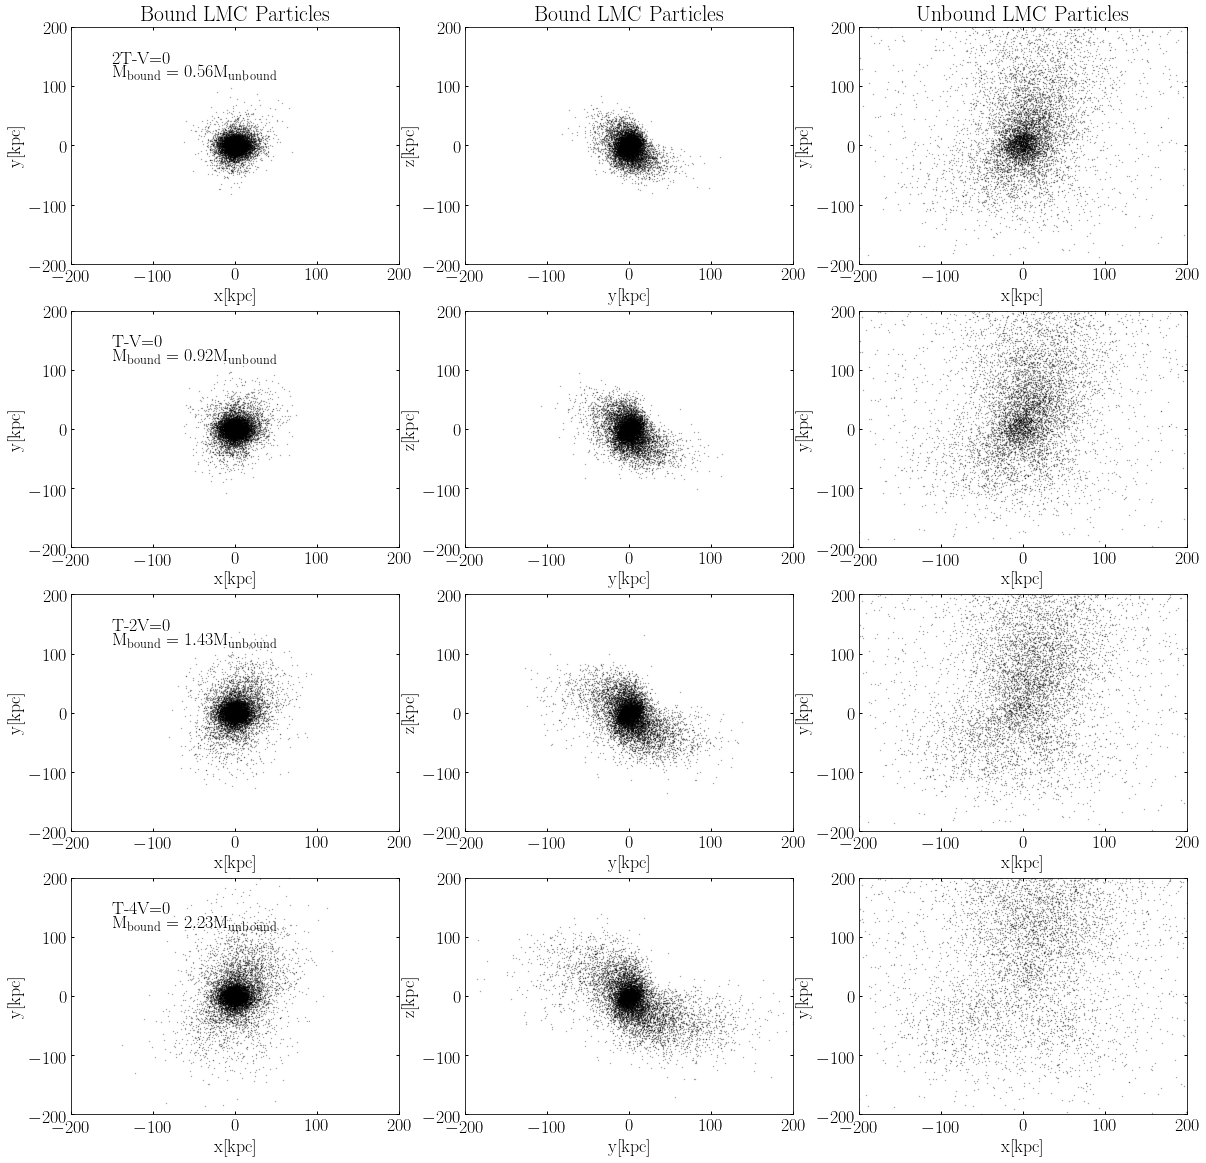

In [118]:
figure(figsize=(20, 20))
subplot(4, 3, 1)
title('Bound LMC Particles')
scatter(pos_lmc_com[lmc_bound][0:10000,0], pos_lmc_com[lmc_bound][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')
text(-150, 140, '2T-V=0')
text(-150, 110, r'$\rm{M_{bound}}=0.56 \rm{M_{unbound}}$')

subplot(4, 3, 2)
title('Bound LMC Particles')
scatter(pos_lmc_com[lmc_bound][0:10000,1], pos_lmc_com[lmc_bound][0:10000,2], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('y[kpc]')
ylabel('z[kpc]')


subplot(4, 3, 3)
title('Unbound LMC Particles')

scatter(pos_lmc_com[lmc_unbound][0:10000,0], pos_lmc_com[lmc_unbound][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')

subplot(4, 3, 4)
scatter(pos_lmc_com[lmc_bound2][0:10000,0], pos_lmc_com[lmc_bound2][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')
text(-150, 140, 'T-V=0')
text(-150, 110, r'$\rm{M_{bound}}=0.92 \rm{M_{unbound}}$')

subplot(4, 3, 5)
scatter(pos_lmc_com[lmc_bound2][0:10000,1], pos_lmc_com[lmc_bound2][0:10000,2], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('y[kpc]')
ylabel('z[kpc]')


subplot(4, 3, 6)
scatter(pos_lmc_com[lmc_unbound2][0:10000,0], pos_lmc_com[lmc_unbound2][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')

subplot(4, 3, 7)
scatter(pos_lmc_com[lmc_bound3][0:10000,0], pos_lmc_com[lmc_bound3][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')
text(-150, 140, 'T-2V=0')
text(-150, 110, r'$\rm{M_{bound}}=1.43 \rm{M_{unbound}}$')

subplot(4, 3, 8)
scatter(pos_lmc_com[lmc_bound3][0:10000,1], pos_lmc_com[lmc_bound3][0:10000,2], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('y[kpc]')
ylabel('z[kpc]')

subplot(4, 3, 9)
scatter(pos_lmc_com[lmc_unbound3][0:10000,0], pos_lmc_com[lmc_unbound3][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')


subplot(4, 3, 10)
scatter(pos_lmc_com[lmc_bound5][0:10000,0], pos_lmc_com[lmc_bound5][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')
text(-150, 140, 'T-4V=0')
text(-150, 110, r'$\rm{M_{bound}}=2.23 \rm{M_{unbound}}$')

subplot(4, 3, 11)
scatter(pos_lmc_com[lmc_bound5][0:10000,1], pos_lmc_com[lmc_bound5][0:10000,2], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('y[kpc]')
ylabel('z[kpc]')

subplot(4, 3, 12)
scatter(pos_lmc_com[lmc_unbound5][0:10000,0], pos_lmc_com[lmc_unbound5][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')


savefig('LMC_bound_particles.png', bbox_inches='tight')

In [112]:
## Fraction of mass of the bound and unbound partiles:

print((len(lmc_bound)/len(lmc_unbound)))
print((len(lmc_bound2)/len(lmc_unbound2)))
print((len(lmc_bound3)/len(lmc_unbound3)))
print((len(lmc_bound5)/len(lmc_unbound5)))

0.5649280837299122
0.9246277288815411
1.4301690911653633
2.2311952514354583
